In [323]:
import pandas as pd

# read dataframe from file
cells_df = pd.read_csv('../eigenspike/pca_ephys_features.csv')
cells_df = cells_df.set_index('id')
cells_df.head()

,mouse_line,region,layer,hemisphere,dendrite_type,apical,has_morphology,has_reconstruction,normalized_depth,reference_space_id,...,ephys_ss_01,ephys_ss_02,ephys_ss_03,ephys_ss_04,ephys_ss_05,ephys_ss_06,ephys_ss_07,ephys_ss_08,ephys_ss_09,ephys_cluster
id,,,,,,,,,,,,,,,,,,,,,
324257146,Sst-IRES-Cre,VISp,4,left,aspiny,NaN,True,True,0.410398,9,...,1.170828,-1.163381,-1.093751,-0.253957,2.135071,-0.337337,1.784947,-1.081003,0.304944,3
469622566,Scnn1a-Tg3-Cre,VISp,5,right,spiny,truncated,True,False,0.423992,9,...,0.100590,0.391349,0.187695,0.196732,-0.570378,-0.041735,-0.291465,0.387696,-0.775480,25
328876201,Sst-IRES-Cre,VISp,5,left,aspiny,NaN,False,False,0.510874,9,...,-2.206795,2.194863,-1.924652,-1.294871,0.688790,0.695502,-0.851446,-1.023581,0.794630,4
466431949,Scnn1a-Tg3-Cre,VISl,4,left,spiny,truncated,True,False,0.464470,9,...,-0.848878,1.475682,-1.710938,0.626604,-0.345677,-0.824317,-1.126075,0.900409,-0.220645,4
396903227,Scnn1a-Tg3-Cre,VISp,5,right,spiny,truncated,False,False,0.497223,9,...,-0.128818,0.896799,-2.069474,-0.439117,-0.464414,0.827571,-0.393268,0.266873,0.687433,4


In [324]:
filtered_cells = cells_df[cells_df['has_reconstruction']]

In [325]:
import numpy as np
import os

# make a new dataframe with the profile
types = ['basal_dendrite','apical_dendrite']
nbins = 100
cols = []

for t in types :
    cols += ['%s_%03d' % (t,i) for i in range(nbins)]

profile_df = pd.DataFrame(index=filtered_cells.index, columns=cols)

In [326]:
base_directory = r'C:\Data\FHL2015\SWDB-2015\presentations\celltypes\ccf_sholl\morphology'

for idx,c in profile_df.iterrows() :
    
    exp_directory = os.path.join( base_directory, 'morphology_%d' % idx )
    
    for t in types :
        
        fname = os.path.join( exp_directory, '%s.npy' % t )
        a = np.load( fname ) 
        
        start_label = '%s_%03d' % (t,0)
        end_label = '%s_%03d' % (t,nbins-1)
        
        profile_df.ix[idx,start_label:end_label] = a


In [327]:
profile_df.head()

,basal_dendrite_000,basal_dendrite_001,basal_dendrite_002,basal_dendrite_003,basal_dendrite_004,basal_dendrite_005,basal_dendrite_006,basal_dendrite_007,basal_dendrite_008,basal_dendrite_009,...,apical_dendrite_090,apical_dendrite_091,apical_dendrite_092,apical_dendrite_093,apical_dendrite_094,apical_dendrite_095,apical_dendrite_096,apical_dendrite_097,apical_dendrite_098,apical_dendrite_099
id,,,,,,,,,,,,,,,,,,,,,
324257146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469798159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348592897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464188580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324493977,0,0,0,0,0,1,12,17,18,20,...,0,0,0,0,0,0,0,0,0,0


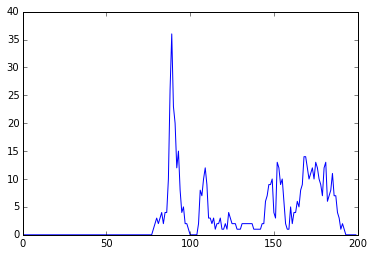

In [328]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(profile_df.ix[471789504])

In [329]:
profile_df.to_csv( 'morphology_profile.csv')

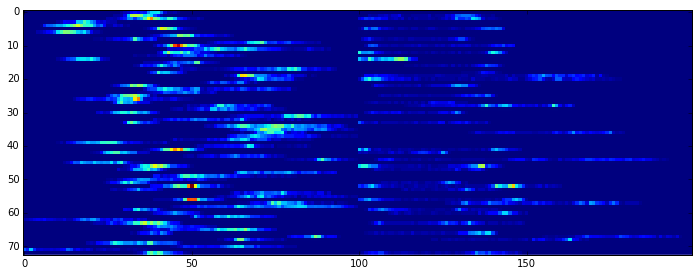

In [330]:
pt = profile_df.ix[:,:].values
plt.figure(figsize=(12,12))
a = plt.imshow(pt,interpolation='none')

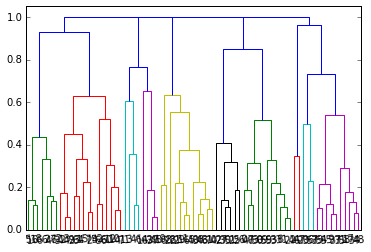

In [355]:
import scipy.cluster.hierarchy as sch

Y = sch.linkage(pt,method='complete',metric='cosine')
Z = sch.dendrogram(Y,distance_sort=True)

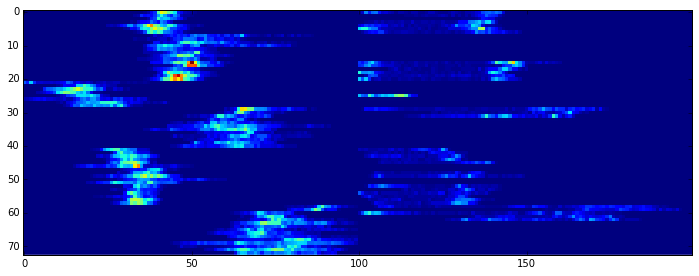

In [356]:
idx = Z['leaves']
reordered = pt[idx,:]
plt.figure(figsize=(12,12))
a = plt.imshow(reordered,interpolation='none')

#threshold = 0.7*max(Y[:,2])
threshold = 0.5
clusters = sch.fcluster(Y,threshold,'distance')

In [357]:
reordered_df = filtered_cells.reindex(filtered_cells.index[idx])

In [358]:
smaller_tf = reordered_df.ix[:,0:9]

In [359]:
smaller_tf['profile_cluster'] = clusters[idx]
smaller_tf.to_csv( 'morphology_clustered.csv')
smaller_tf

,mouse_line,region,layer,hemisphere,dendrite_type,apical,has_morphology,has_reconstruction,normalized_depth,profile_cluster
id,,,,,,,,,,
467703703,Scnn1a-Tg2-Cre,VISp,4,right,spiny,intact,True,True,0.408216,1
321906005,Nr5a1-Cre,VISp,4,left,spiny,intact,True,True,0.425421,1
319070795,Nr5a1-Cre,VISp,4,left,spiny,truncated,True,True,0.425700,1
397351623,Nr5a1-Cre,VISp,4,left,spiny,intact,True,True,0.408680,1
348592897,Scnn1a-Tg2-Cre,VISp,4,left,spiny,intact,True,True,0.382884,1
466928405,Scnn1a-Tg3-Cre,VISp,4,right,spiny,intact,True,True,0.381883,1
313862022,Scnn1a-Tg2-Cre,VISp,4,right,spiny,intact,True,True,0.389582,1
471077857,Pvalb-IRES-Cre,VISp,5,left,aspiny,NaN,True,True,0.566174,2
336676216,Pvalb-IRES-Cre,VISp,5,left,aspiny,NaN,True,True,0.498731,2


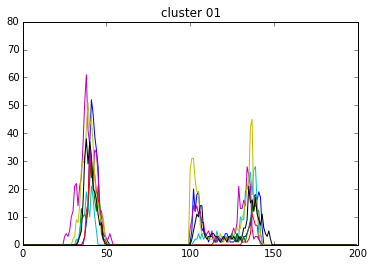

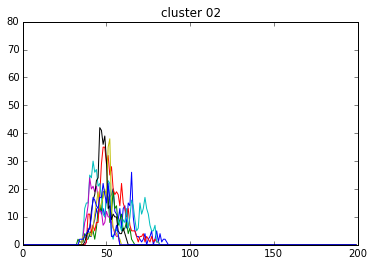

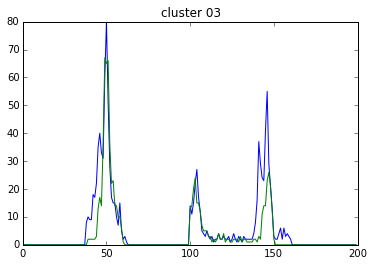

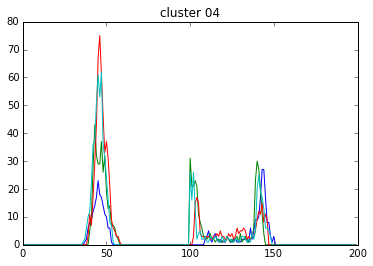

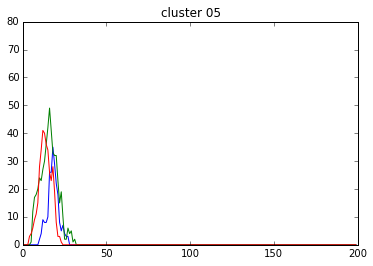

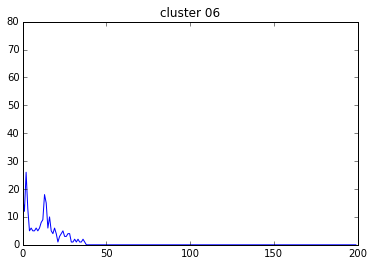

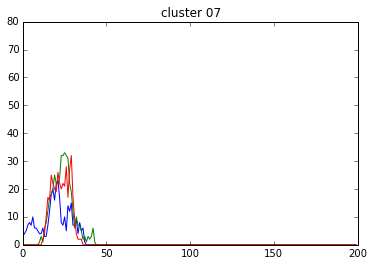

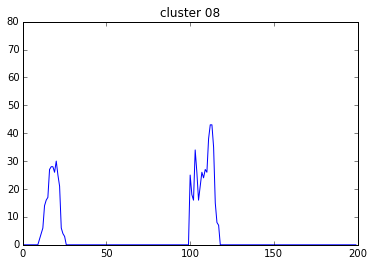

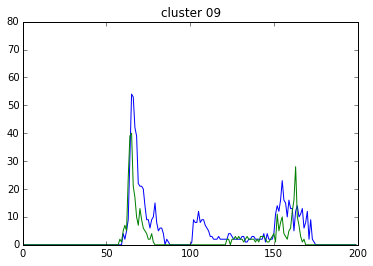

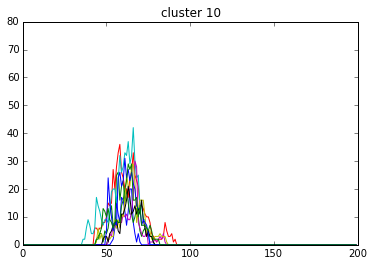

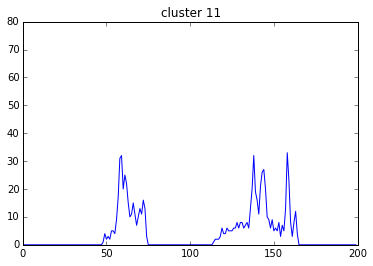

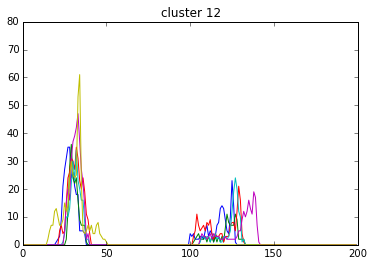

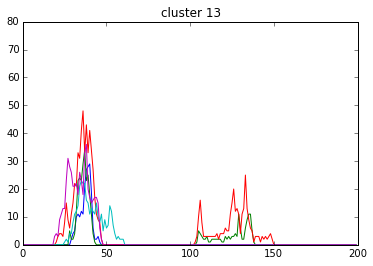

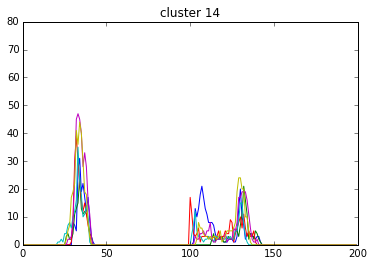

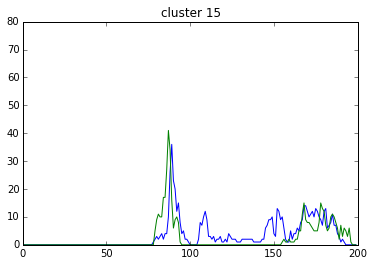

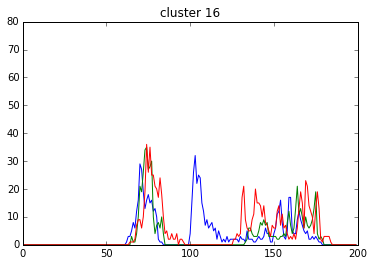

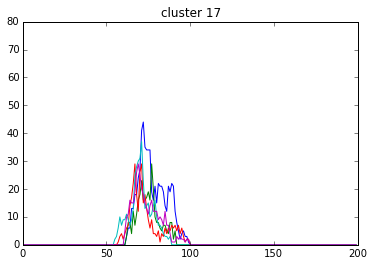

In [361]:
for i in range(1,len(pd.unique(smaller_tf['profile_cluster']))) :
    plt.figure()
    plt.plot(reordered[smaller_tf['profile_cluster'].values == i].T)
    plt.title('cluster %02d' % i)
    plt.ylim([0,80])